In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [2]:
df = pd.read_csv('student_habits_performance.csv')

In [3]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7


In [4]:
df['study_hours_per_day'].min()

np.float64(0.0)

In [5]:
df['study_hours_per_day'].max()

np.float64(8.3)

In [6]:
# Adding categorical column 
df['study_hours_category'] = np.where(df['study_hours_per_day'] == 0, 'None',
                                    np.where(df['study_hours_per_day'] <= 1, 'Low',
                                             np.where(df['study_hours_per_day'] <= 4, 'Moderate', 
                                                      np.where(df['study_hours_per_day'] <= 6, 'High', 'Very High'))))

In [7]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,study_hours_category
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,None
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,Very High
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,Moderate
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,Low
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1,Moderate
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9,Moderate
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4,Moderate
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7,High


In [8]:
df['social_media_hours'].min()

np.float64(0.0)

In [9]:
df['social_media_hours'].max()

np.float64(7.2)

In [10]:
# Adding categorical social media column
df['social_media_category'] = np.where(df['social_media_hours'] == 0, 'None',
                                    np.where(df['social_media_hours'] <= 2, 'Low',
                                             np.where(df['social_media_hours'] <= 4, 'Moderate',
                                                      np.where(df['social_media_hours'] <= 6, 'High', 'Very High'))))

In [11]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,study_hours_category,social_media_category
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,None,Low
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,Very High,Moderate
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,Moderate,Moderate
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,Low,Moderate
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1,Moderate,Low
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9,Moderate,Low
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4,Moderate,Moderate
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7,High,High


In [12]:
df['netflix_hours'].min()

np.float64(0.0)

In [13]:
df['netflix_hours'].max()

np.float64(5.4)

In [14]:
df['netflix_hours_category'] = np.where(df['netflix_hours'] == 0, 'None',
                                        np.where(df['netflix_hours'] <= 1, 'Low',
                                                 np.where(df['netflix_hours'] <= 2, 'Moderate',
                                                          np.where(df['netflix_hours'] <= 4, 'High', 'Very High'))))

In [15]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,study_hours_category,social_media_category,netflix_hours_category
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,None,Low,Moderate
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,Very High,Moderate,High
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,Moderate,Moderate,Moderate
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,Low,Moderate,Low
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,High,High,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1,Moderate,Low,Moderate
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9,Moderate,Low,High
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4,Moderate,Moderate,Moderate
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7,High,High,Moderate


In [16]:
df['attendance_percentage'].min()

np.float64(56.0)

In [17]:
df['attendance_percentage'].max()

np.float64(100.0)

In [18]:
df['attendance_percentage_category'] = np.where(df['attendance_percentage'] < 60, 'Very Poor',
                                        np.where(df['attendance_percentage'] <= 70, 'Poor',
                                                 np.where(df['attendance_percentage'] <= 80, 'Fair',
                                                          np.where(df['attendance_percentage'] <= 90, 'Good', 'Excellent'))))

In [19]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,study_hours_category,social_media_category,netflix_hours_category,attendance_percentage_category
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,None,Low,Moderate,Good
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,Very High,Moderate,High,Excellent
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,Moderate,Moderate,Moderate,Excellent
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,Low,Moderate,Low,Fair
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,High,High,Low,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1,Moderate,Low,Moderate,Fair
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9,Moderate,Low,High,Good
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4,Moderate,Moderate,Moderate,Poor
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7,High,High,Moderate,Excellent


In [20]:
df['sleep_hours'].min()

np.float64(3.2)

In [21]:
df['sleep_hours'].max()

np.float64(10.0)

In [22]:
df['sleep_hours_category'] = np.where(df['sleep_hours'] <= 4.5, 'Severely Sleep Deprived',
                                        np.where(df['sleep_hours'] < 6, 'Sleep Deprived',
                                                 np.where(df['sleep_hours'] <= 8, 'Optimal Range',
                                                          np.where(df['sleep_hours'] < 9, 'Slightly High', 'Possibly Excessive'))))

In [23]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,study_hours_category,social_media_category,netflix_hours_category,attendance_percentage_category,sleep_hours_category
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,...,Master,Average,8,Yes,56.2,None,Low,Moderate,Good,Optimal Range
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,...,High School,Average,8,No,100.0,Very High,Moderate,High,Excellent,Sleep Deprived
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,...,High School,Poor,1,No,34.3,Moderate,Moderate,Moderate,Excellent,Optimal Range
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,...,Master,Good,1,Yes,26.8,Low,Moderate,Low,Fair,Possibly Excessive
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,...,Master,Good,1,No,66.4,High,High,Low,Excellent,Sleep Deprived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,...,High School,Good,6,Yes,76.1,Moderate,Low,Moderate,Fair,Optimal Range
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,...,High School,Average,6,Yes,65.9,Moderate,Low,High,Good,Optimal Range
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,...,Bachelor,Good,9,Yes,64.4,Moderate,Moderate,Moderate,Poor,Optimal Range
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,...,Bachelor,Average,1,No,69.7,High,High,Moderate,Excellent,Optimal Range


In [24]:
df['mental_health_rating'].min()

np.int64(1)

In [25]:
df['mental_health_rating'].max()

np.int64(10)

In [26]:
df['mental_health_rating_category'] = np.where(df['mental_health_rating'] <= 2, 'Very Poor',
                                        np.where(df['mental_health_rating'] <= 4, 'Poor',
                                                 np.where(df['mental_health_rating'] <= 6, 'Fair',
                                                          np.where(df['mental_health_rating'] <= 8, 'Good', 'Excellent'))))

In [27]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,internet_quality,mental_health_rating,extracurricular_participation,exam_score,study_hours_category,social_media_category,netflix_hours_category,attendance_percentage_category,sleep_hours_category,mental_health_rating_category
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,...,Average,8,Yes,56.2,None,Low,Moderate,Good,Optimal Range,Good
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,...,Average,8,No,100.0,Very High,Moderate,High,Excellent,Sleep Deprived,Good
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,...,Poor,1,No,34.3,Moderate,Moderate,Moderate,Excellent,Optimal Range,Very Poor
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,...,Good,1,Yes,26.8,Low,Moderate,Low,Fair,Possibly Excessive,Very Poor
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,...,Good,1,No,66.4,High,High,Low,Excellent,Sleep Deprived,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,...,Good,6,Yes,76.1,Moderate,Low,Moderate,Fair,Optimal Range,Fair
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,...,Average,6,Yes,65.9,Moderate,Low,High,Good,Optimal Range,Fair
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,...,Good,9,Yes,64.4,Moderate,Moderate,Moderate,Poor,Optimal Range,Excellent
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,...,Average,1,No,69.7,High,High,Moderate,Excellent,Optimal Range,Very Poor


In [28]:
df['exam_score'].min()

np.float64(18.4)

In [29]:
df['exam_score'].max()

np.float64(100.0)

In [30]:
df['exam_score_category'] = np.where(df['exam_score'] <= 49, 'Failing',
                                        np.where(df['exam_score'] <= 64.9, 'Below Average',
                                                 np.where(df['exam_score'] <= 74.9, 'Average',
                                                          np.where(df['exam_score'] <=  84.9, 'Good', 'Excellent'))))

In [31]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,mental_health_rating,extracurricular_participation,exam_score,study_hours_category,social_media_category,netflix_hours_category,attendance_percentage_category,sleep_hours_category,mental_health_rating_category,exam_score_category
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,...,8,Yes,56.2,None,Low,Moderate,Good,Optimal Range,Good,Below Average
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,...,8,No,100.0,Very High,Moderate,High,Excellent,Sleep Deprived,Good,Excellent
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,...,1,No,34.3,Moderate,Moderate,Moderate,Excellent,Optimal Range,Very Poor,Failing
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,...,1,Yes,26.8,Low,Moderate,Low,Fair,Possibly Excessive,Very Poor,Failing
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,...,1,No,66.4,High,High,Low,Excellent,Sleep Deprived,Very Poor,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,...,6,Yes,76.1,Moderate,Low,Moderate,Fair,Optimal Range,Fair,Good
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,...,6,Yes,65.9,Moderate,Low,High,Good,Optimal Range,Fair,Average
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,...,9,Yes,64.4,Moderate,Moderate,Moderate,Poor,Optimal Range,Excellent,Below Average
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,...,1,No,69.7,High,High,Moderate,Excellent,Optimal Range,Very Poor,Average


In [32]:
general_order = ['None', 'Low', 'Moderate', 'High', 'Very High']
score_order = ['Very Poor', 'Poor', 'Fair', 'Good', 'Excellent']
sleep_order = ['Severely Sleep Deprived', 'Sleep Deprived', 'Optimal Range', 'Slightly High', 'Possibly Excessive']
exam_order = ['Failing', 'Below Average', 'Average', 'Good', 'Excellent']

df['study_hours_category'] = pd.Categorical(df['study_hours_category'], categories=general_order, ordered=True)
df['social_media_category'] = pd.Categorical(df['social_media_category'], categories=general_order, ordered=True)
df['netflix_hours_category'] = pd.Categorical(df['netflix_hours_category'], categories=general_order, ordered=True)

df['attendance_percentage_category'] = pd.Categorical(df['attendance_percentage_category'], categories=score_order, ordered=True)
df['mental_health_rating_category'] = pd.Categorical(df['mental_health_rating_category'], categories=score_order, ordered=True)

df['sleep_hours_category'] = pd.Categorical(df['sleep_hours_category'], categories=sleep_order, ordered=True)

df['exam_score_category'] = pd.Categorical(df['exam_score_category'], categories=exam_order, ordered=True)

In [33]:
# Checking association between exam score and mental health
contingency_table = pd.crosstab(df['mental_health_rating_category'], df['exam_score_category'])
print(contingency_table)

exam_score_category            Failing  Below Average  Average  Good  \
mental_health_rating_category                                          
Very Poor                           42             68       44    26   
Poor                                36             66       53    37   
Fair                                26             54       48    47   
Good                                13             39       56    30   
Excellent                            3             32       42    50   

exam_score_category            Excellent  
mental_health_rating_category             
Very Poor                             16  
Poor                                  23  
Fair                                  32  
Good                                  58  
Excellent                             59  


In [34]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Statistic: {chi2:.2f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p:.24f}")

Chi-Squared Statistic: 119.98
Degrees of Freedom: 16
P-value: 0.000000000000000005546007


In [35]:
# Checking association between sleep and mental health
contingency_table_sleep = pd.crosstab(df['sleep_hours_category'], df['exam_score_category'])
print(contingency_table_sleep)

exam_score_category      Failing  Below Average  Average  Good  Excellent
sleep_hours_category                                                     
Severely Sleep Deprived        9             17       14     5          5
Sleep Deprived                31             96       67    53         46
Optimal Range                 67            125      138   113        111
Slightly High                 11             16       18    12         20
Possibly Excessive             2              5        6     7          6


In [36]:
chi2_sleep, p_sleep, dof_sleep, expected_sleep = chi2_contingency(contingency_table_sleep)

print(f"Chi-Squared Statistic: {chi2_sleep:.2f}")
print(f"Degrees of Freedom: {dof_sleep}")
print(f"P-value: {p_sleep:.24f}")

Chi-Squared Statistic: 24.13
Degrees of Freedom: 16
P-value: 0.086807138215473866882377


In [37]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,mental_health_rating,extracurricular_participation,exam_score,study_hours_category,social_media_category,netflix_hours_category,attendance_percentage_category,sleep_hours_category,mental_health_rating_category,exam_score_category
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,...,8,Yes,56.2,None,Low,Moderate,Good,Optimal Range,Good,Below Average
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,...,8,No,100.0,Very High,Moderate,High,Excellent,Sleep Deprived,Good,Excellent
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,...,1,No,34.3,Moderate,Moderate,Moderate,Excellent,Optimal Range,Very Poor,Failing
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,...,1,Yes,26.8,Low,Moderate,Low,Fair,Possibly Excessive,Very Poor,Failing
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,...,1,No,66.4,High,High,Low,Excellent,Sleep Deprived,Very Poor,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,...,6,Yes,76.1,Moderate,Low,Moderate,Fair,Optimal Range,Fair,Good
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,...,6,Yes,65.9,Moderate,Low,High,Good,Optimal Range,Fair,Average
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,...,9,Yes,64.4,Moderate,Moderate,Moderate,Poor,Optimal Range,Excellent,Below Average
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,...,1,No,69.7,High,High,Moderate,Excellent,Optimal Range,Very Poor,Average


In [38]:
# Social Media Hours vs Exam Scores
contingency_table_social = pd.crosstab(df['social_media_category'], df['exam_score_category'])
print(contingency_table_social)

exam_score_category    Failing  Below Average  Average  Good  Excellent
social_media_category                                                  
None                         1              6        5     2          7
Low                         24             75       88    76         71
Moderate                    80            150      118    98        103
High                        14             27       32    13          7
Very High                    1              1        0     1          0


In [39]:
chi2_social, p_social, dof_social, expected_social = chi2_contingency(contingency_table_social)

print(f"Chi-Squared Statistic: {chi2_social:.2f}")
print(f"Degrees of Freedom: {dof_social}")
print(f"P-value: {p_social:.24f}")

Chi-Squared Statistic: 37.38
Degrees of Freedom: 16
P-value: 0.001853706948971524728909


In [40]:
contingency_table_netflix = pd.crosstab(df['netflix_hours_category'], df['exam_score_category'])
print(contingency_table_netflix)

exam_score_category     Failing  Below Average  Average  Good  Excellent
netflix_hours_category                                                  
None                          3             14        9    16         17
Low                          11             52       52    44         49
Moderate                     42             74       92    56         59
High                         62            111       84    69         61
Very High                     2              8        6     5          2


In [41]:
chi2_netflix, p_netflix, dof_netflix, expected_netflix = chi2_contingency(contingency_table_netflix)

print(f"Chi-Squared Statistic: {chi2_netflix:.2f}")
print(f"Degrees of Freedom: {dof_netflix}")
print(f"P-value: {p_netflix:.24f}")

Chi-Squared Statistic: 36.70
Degrees of Freedom: 16
P-value: 0.002313096157281230736552


In [42]:
crosstab = pd.crosstab(index=[df['sleep_hours_category'], df['social_media_category']], columns=df['exam_score_category'])
crosstab = crosstab.reset_index()
print(crosstab)

exam_score_category     sleep_hours_category social_media_category  Failing  \
0                    Severely Sleep Deprived                  None        0   
1                    Severely Sleep Deprived                   Low        2   
2                    Severely Sleep Deprived              Moderate        7   
3                    Severely Sleep Deprived                  High        0   
4                             Sleep Deprived                  None        1   
5                             Sleep Deprived                   Low        9   
6                             Sleep Deprived              Moderate       18   
7                             Sleep Deprived                  High        3   
8                             Sleep Deprived             Very High        0   
9                              Optimal Range                  None        0   
10                             Optimal Range                   Low       13   
11                             Optimal Range        

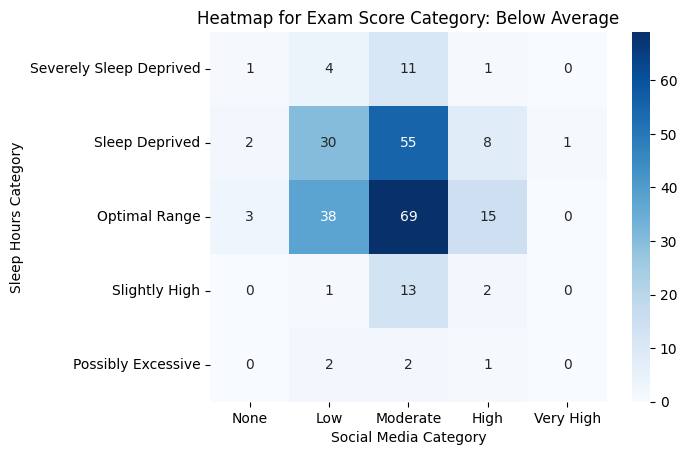

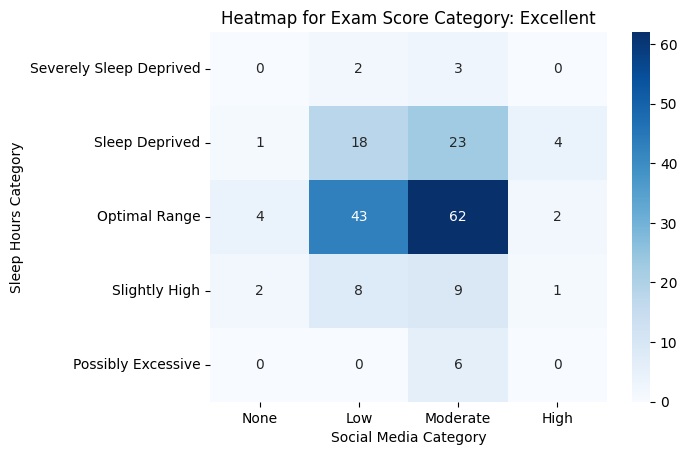

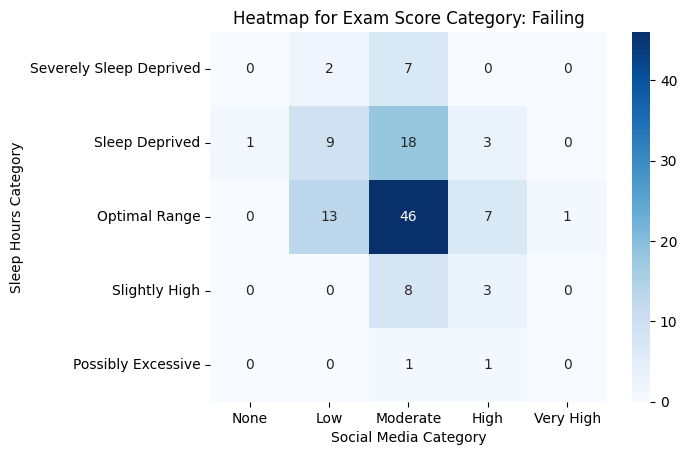

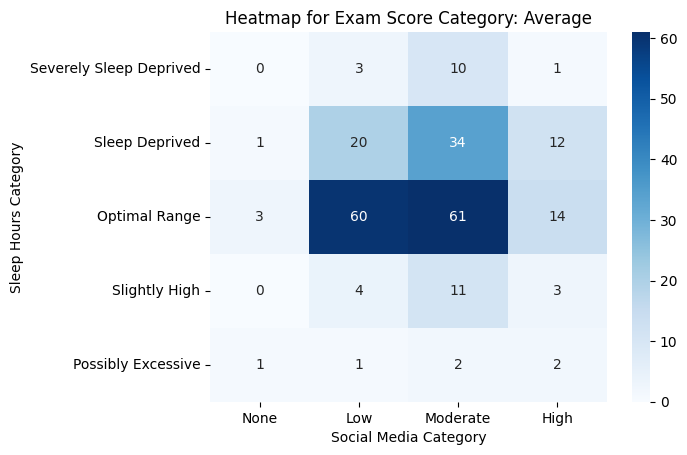

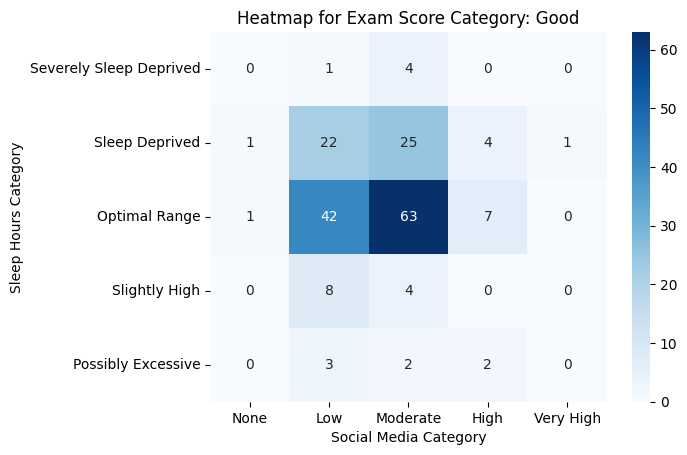

In [43]:
for score_cat in df['exam_score_category'].unique():
    temp = df[df['exam_score_category'] == score_cat]
    heatmap_data = pd.crosstab(temp['sleep_hours_category'], temp['social_media_category'])
    
    sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Heatmap for Exam Score Category: {score_cat}')
    plt.ylabel("Sleep Hours Category")
    plt.xlabel("Social Media Category")
    plt.show()

In [44]:
# Checking association between attendance and exam scores
contingency_table_attendance = pd.crosstab(df['attendance_percentage_category'], df['exam_score_category'])
print(contingency_table_attendance)

exam_score_category             Failing  Below Average  Average  Good  \
attendance_percentage_category                                          
Very Poor                             0              4        0     3   
Poor                                  7             19       26    10   
Fair                                 35             68       59    45   
Good                                 51            104       92    76   
Excellent                            27             64       66    56   

exam_score_category             Excellent  
attendance_percentage_category             
Very Poor                               0  
Poor                                    8  
Fair                                   45  
Good                                   73  
Excellent                              62  


In [45]:
chi2_attendance, p_attendance, dof_attendance, expected_attendance = chi2_contingency(contingency_table_attendance)

print(f"Chi-Squared Statistic: {chi2_attendance:.2f}")
print(f"Degrees of Freedom: {dof_attendance}")
print(f"P-value: {p_attendance:.24f}")

Chi-Squared Statistic: 22.35
Degrees of Freedom: 16
P-value: 0.132249475770457397549862


In [46]:
contingency_table_study = pd.crosstab(df['study_hours_category'], df['exam_score_category'])
print(contingency_table_study)

exam_score_category   Failing  Below Average  Average  Good  Excellent
study_hours_category                                                  
None                        8              5        0     0          0
Low                        24              7        0     0          0
Moderate                   88            227      176    81         19
High                        0             20       67   109        125
Very High                   0              0        0     0         44


In [47]:
chi2_study, p_study, dof_study, expected_study = chi2_contingency(contingency_table_study)

print(f"Chi-Squared Statistic: {chi2_study:.2f}")
print(f"Degrees of Freedom: {dof_study}")
print(f"P-value: {p_study:.24f}")

Chi-Squared Statistic: 682.71
Degrees of Freedom: 16
P-value: 0.000000000000000000000000


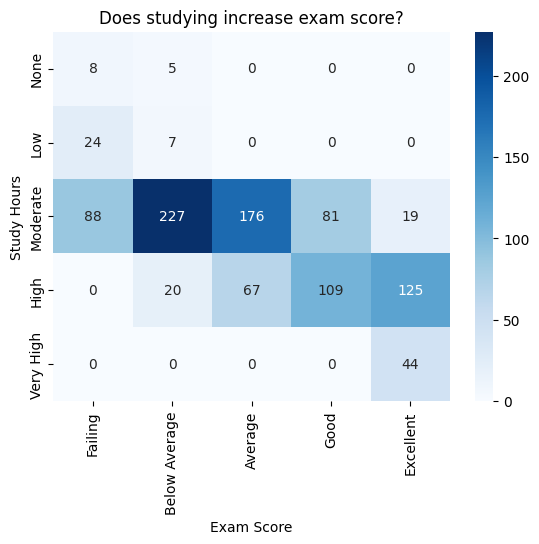

In [48]:
sns.heatmap(contingency_table_study, annot=True, fmt="d", cmap="Blues")

plt.title(f'Does studying increase exam score?')
plt.ylabel("Study Hours")
plt.xlabel("Exam Score")
plt.show()

In [49]:
df

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,mental_health_rating,extracurricular_participation,exam_score,study_hours_category,social_media_category,netflix_hours_category,attendance_percentage_category,sleep_hours_category,mental_health_rating_category,exam_score_category
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,...,8,Yes,56.2,None,Low,Moderate,Good,Optimal Range,Good,Below Average
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,...,8,No,100.0,Very High,Moderate,High,Excellent,Sleep Deprived,Good,Excellent
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,...,1,No,34.3,Moderate,Moderate,Moderate,Excellent,Optimal Range,Very Poor,Failing
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,...,1,Yes,26.8,Low,Moderate,Low,Fair,Possibly Excessive,Very Poor,Failing
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,...,1,No,66.4,High,High,Low,Excellent,Sleep Deprived,Very Poor,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,S1995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,...,6,Yes,76.1,Moderate,Low,Moderate,Fair,Optimal Range,Fair,Good
996,S1996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,...,6,Yes,65.9,Moderate,Low,High,Good,Optimal Range,Fair,Average
997,S1997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,...,9,Yes,64.4,Moderate,Moderate,Moderate,Poor,Optimal Range,Excellent,Below Average
998,S1998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,...,1,No,69.7,High,High,Moderate,Excellent,Optimal Range,Very Poor,Average


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm

# Predictors (categorical, ordered)
X = df[['sleep_hours_category', 'mental_health_rating_category',
        'netflix_hours_category', 'social_media_category', 'study_hours_category']]

# Target (numeric exam score)
y = df['exam_score']  # numeric

# Encode categorical features
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Add constant for statsmodels
X_encoded = sm.add_constant(X_encoded)

# Fit linear regression
model = sm.OLS(y, X_encoded).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     38.05
Date:                Tue, 13 May 2025   Prob (F-statistic):           8.61e-36
Time:                        03:39:11   Log-Likelihood:                -4157.5
No. Observations:                1000   AIC:                             8327.
Df Residuals:                     994   BIC:                             8356.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         82.2928      1.685     48.832      0.0

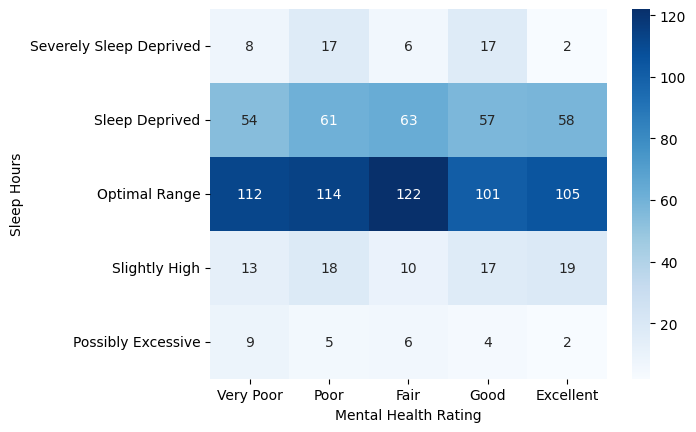

In [51]:
contingency_table_sleep_mental = pd.crosstab(df['sleep_hours_category'], df['mental_health_rating_category'])

sns.heatmap(contingency_table_sleep_mental, annot=True, fmt="d", cmap="Blues")

plt.ylabel("Sleep Hours")
plt.xlabel("Mental Health Rating")
plt.show()

study_hours_category     None  Low  Moderate  High  Very High
sleep_hours_category                                         
Severely Sleep Deprived     2    1        30    15          2
Sleep Deprived              4    7       166   102         14
Optimal Range               6   17       329   176         26
Slightly High               1    4        51    20          1
Possibly Excessive          0    2        15     8          1


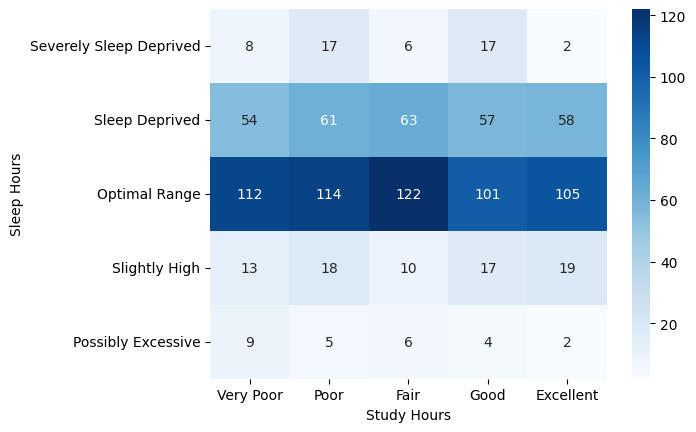

In [52]:
contingency_table_sleep_study = pd.crosstab(df['sleep_hours_category'], df['study_hours_category'])
print(contingency_table_sleep_study)

sns.heatmap(contingency_table_sleep_mental, annot=True, fmt="d", cmap="Blues")

plt.ylabel("Sleep Hours")
plt.xlabel("Study Hours")
plt.show()

In [53]:
# Predictors (categorical, ordered)
X = df[['sleep_hours_category', 'mental_health_rating_category',
        'netflix_hours_category', 'social_media_category']]

# Target (numeric exam score)
y = df['study_hours_per_day']  # numeric

# Encode categorical features
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Add constant for statsmodels
X_encoded = sm.add_constant(X_encoded)

# Fit linear regression
model = sm.OLS(y, X_encoded).fit()
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     study_hours_per_day   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.003
Method:                  Least Squares   F-statistic:                    0.2687
Date:                 Tue, 13 May 2025   Prob (F-statistic):              0.898
Time:                         03:39:11   Log-Likelihood:                -1802.4
No. Observations:                 1000   AIC:                             3615.
Df Residuals:                      995   BIC:                             3639.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4270      0.147     23.31

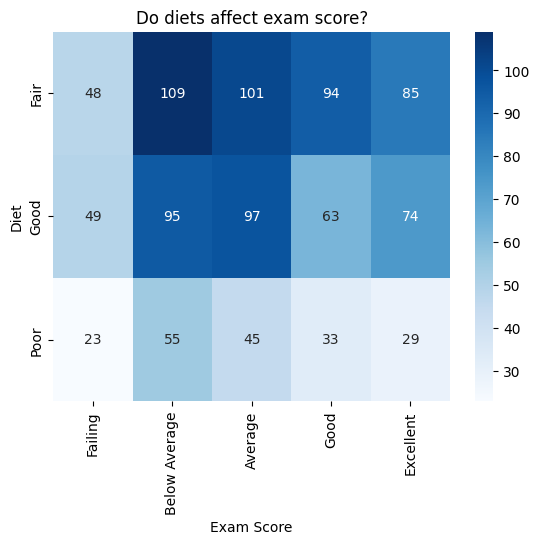

In [54]:
contingency_table_diet = pd.crosstab(df['diet_quality'], df['exam_score_category'])

sns.heatmap(contingency_table_diet, annot=True, fmt="d", cmap="Blues")

plt.title(f'Do diets affect exam score?')
plt.ylabel("Diet")
plt.xlabel("Exam Score")
plt.show()